In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from plotly import tools
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('H-1B_Disclosure_Data_FY17.csv')

In [3]:
df.head()

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-01
1,1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-08
2,2,I-200-16063-996093,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,NaN,...,Y,N,Y,NaN,NaN,WASHINGTON,NaN,DC,20007,2016-03-16
3,3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,NaN,...,Y,N,Y,NaN,NaN,JERSEY CITY,HUDSON,NJ,07302,NaN
4,4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,NaN,...,N,N,NaN,Y,NaN,NEW YORK,NEW YORK,NY,10036,2015-02-26


In [4]:
df = df.iloc[:,2:]

In [5]:
df.head()

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,NaN,2500 LAKE COOK ROAD,RIVERWOODS,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-01
1,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,NaN,2500 LAKE COOK ROAD,RIVERWOODS,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-08
2,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,NaN,1211 31ST ST. NW,WASHINGTON,...,Y,N,Y,NaN,NaN,WASHINGTON,NaN,DC,20007,2016-03-16
3,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,NaN,17177 NORTH LAUREL PARK DR,LIVONIA,...,Y,N,Y,NaN,NaN,JERSEY CITY,HUDSON,NJ,07302,NaN
4,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,NaN,223 WEST NASH STREET,WILSON,...,N,N,NaN,Y,NaN,NEW YORK,NEW YORK,NY,10036,2015-02-26


In [6]:
df.isnull().sum()['EMPLOYER_BUSINESS_DBA']

581380

In [7]:
drop_cols = []
for col in list(df.columns):
    if(df.isnull().sum()[col]>500000):
        drop_cols.append(col)
df.drop(drop_cols,1,inplace=True)

In [8]:
df.isnull().sum()

CASE_STATUS                         0
CASE_SUBMITTED                      0
DECISION_DATE                       0
VISA_CLASS                          0
EMPLOYMENT_START_DATE              29
EMPLOYMENT_END_DATE                30
EMPLOYER_NAME                      56
EMPLOYER_ADDRESS                    7
EMPLOYER_CITY                      15
EMPLOYER_STATE                     18
EMPLOYER_POSTAL_CODE               18
EMPLOYER_COUNTRY                96507
EMPLOYER_PHONE                  96508
AGENT_REPRESENTING_EMPLOYER     96506
AGENT_ATTORNEY_NAME                 0
AGENT_ATTORNEY_CITY            273306
AGENT_ATTORNEY_STATE           288641
JOB_TITLE                           5
SOC_CODE                            2
SOC_NAME                            3
NAICS_CODE                          7
TOTAL_WORKERS                       0
NEW_EMPLOYMENT                      0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           0
CHANGE_EMPLO

In [9]:
df.shape

(624650, 46)

In [10]:
df.drop(['EMPLOYER_PHONE'],1,inplace=True)

In [11]:
df.isnull().sum()

CASE_STATUS                         0
CASE_SUBMITTED                      0
DECISION_DATE                       0
VISA_CLASS                          0
EMPLOYMENT_START_DATE              29
EMPLOYMENT_END_DATE                30
EMPLOYER_NAME                      56
EMPLOYER_ADDRESS                    7
EMPLOYER_CITY                      15
EMPLOYER_STATE                     18
EMPLOYER_POSTAL_CODE               18
EMPLOYER_COUNTRY                96507
AGENT_REPRESENTING_EMPLOYER     96506
AGENT_ATTORNEY_NAME                 0
AGENT_ATTORNEY_CITY            273306
AGENT_ATTORNEY_STATE           288641
JOB_TITLE                           5
SOC_CODE                            2
SOC_NAME                            3
NAICS_CODE                          7
TOTAL_WORKERS                       0
NEW_EMPLOYMENT                      0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           0
CHANGE_EMPLOYER                     0
AMENDED_PETI

In [12]:
df.AGENT_ATTORNEY_NAME.value_counts()

,                                           273306
GOEL, VIC                                     5072
WALSH, MARC                                   5065
GUPTA, OISHIKA                                4873
MICHAELS, REBECCA                             4169
CHUGH, NAVNEET                                4158
MUHLENKAMP, PRISCILLA                         4023
ALLEN, THOMAS                                 3590
ALEMU, SAMUEL                                 3330
SHEPARD, MICHELLE                             2364
JETHMALANI, ANIL                              2202
ANNICELLI, SAPNA                              2008
SHERIDAN REGUERIN, SANDRA                     1764
AKULA, KAVITHA                                1754
BAHNAN, NADINE                                1576
SEADIE, KESHAB                                1568
LAMBOLEY, HAROLD                              1423
EISENSTADT, MICHAEL                           1373
NALLIAH, RAJAGURU                             1347
NIEVES, JENNY                  

In [13]:
df.head()

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,...,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE
0,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,2500 LAKE COOK ROAD,RIVERWOODS,IL,...,67320.0,Year,N,N,NaN,Y,RIVERWOODS,LAKE,IL,60015
1,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,2500 LAKE COOK ROAD,RIVERWOODS,IL,...,57200.0,Year,N,N,NaN,Y,RIVERWOODS,LAKE,IL,60015
2,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,1211 31ST ST. NW,WASHINGTON,DC,...,0.0,Year,Y,N,Y,NaN,WASHINGTON,NaN,DC,20007
3,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,17177 NORTH LAUREL PARK DR,LIVONIA,MI,...,0.0,Year,Y,N,Y,NaN,JERSEY CITY,HUDSON,NJ,07302
4,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,223 WEST NASH STREET,WILSON,NC,...,0.0,Year,N,N,NaN,Y,NEW YORK,NEW YORK,NY,10036


In [14]:
df.dtypes

CASE_STATUS                     object
CASE_SUBMITTED                  object
DECISION_DATE                   object
VISA_CLASS                      object
EMPLOYMENT_START_DATE           object
EMPLOYMENT_END_DATE             object
EMPLOYER_NAME                   object
EMPLOYER_ADDRESS                object
EMPLOYER_CITY                   object
EMPLOYER_STATE                  object
EMPLOYER_POSTAL_CODE            object
EMPLOYER_COUNTRY                object
AGENT_REPRESENTING_EMPLOYER     object
AGENT_ATTORNEY_NAME             object
AGENT_ATTORNEY_CITY             object
AGENT_ATTORNEY_STATE            object
JOB_TITLE                       object
SOC_CODE                        object
SOC_NAME                        object
NAICS_CODE                      object
TOTAL_WORKERS                    int64
NEW_EMPLOYMENT                   int64
CONTINUED_EMPLOYMENT             int64
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT        int64
CHANGE_EMPLOYER          

In [15]:
drop_cols = ['EMPLOYER_ADDRESS','EMPLOYER_CITY','AGENT_ATTORNEY_NAME','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','SOC_NAME','WORKSITE_CITY','WORKSITE_COUNTY']
df.drop(drop_cols,1,inplace=True)

In [16]:
df.SUPPORT_H1B.value_counts()

Y    231915
N      8561
Name: SUPPORT_H1B, dtype: int64

In [17]:
df.VISA_CLASS.value_counts(0)

H-1B               610304
E-3 Australian      12157
H-1B1 Singapore      1254
H-1B1 Chile           935
Name: VISA_CLASS, dtype: int64

In [18]:
df.CASE_STATUS.value_counts()

CERTIFIED              545694
CERTIFIED-WITHDRAWN     49704
WITHDRAWN               20772
DENIED                   8480
Name: CASE_STATUS, dtype: int64

In [19]:
cols = ['CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT','FULL_TIME_POSITION','PW_UNIT_OF_PAY','WAGE_UNIT_OF_PAY','WILLFUL_VIOLATOR']
for col in cols:
    print(df[col].value_counts())

0     489397
1     120710
5       5013
3       2943
2       2554
9       1666
4        742
10       561
15       483
25       206
8        125
50       102
6         83
30        19
20        14
14        10
12         4
22         4
7          3
28         3
55         3
40         2
17         1
18         1
35         1
Name: CONTINUED_EMPLOYMENT, dtype: int64
0     579838
1      36379
2       2414
5       2374
3       1677
4        708
10       405
25       347
15       246
8        106
6         77
50        43
20        26
30         4
40         2
7          1
45         1
19         1
9          1
Name: CHANGE_PREVIOUS_EMPLOYMENT, dtype: int64
Y    610769
N     13876
Name: FULL_TIME_POSITION, dtype: int64
Year         585301
Hour          38779
Month           327
Week            140
Bi-Weekly        57
Name: PW_UNIT_OF_PAY, dtype: int64
Year         585417
Hour          38405
Month           502
Week            188
Bi-Weekly       130
Name: WAGE_UNIT_OF_PAY, dtype: int64
N    

In [20]:
df.isnull().sum()

CASE_STATUS                         0
CASE_SUBMITTED                      0
DECISION_DATE                       0
VISA_CLASS                          0
EMPLOYMENT_START_DATE              29
EMPLOYMENT_END_DATE                30
EMPLOYER_NAME                      56
EMPLOYER_STATE                     18
EMPLOYER_POSTAL_CODE               18
EMPLOYER_COUNTRY                96507
AGENT_REPRESENTING_EMPLOYER     96506
JOB_TITLE                           5
SOC_CODE                            2
NAICS_CODE                          7
TOTAL_WORKERS                       0
NEW_EMPLOYMENT                      0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           0
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
FULL_TIME_POSITION                  5
PREVAILING_WAGE                     1
PW_UNIT_OF_PAY                     46
PW_WAGE_LEVEL                  123720
PW_SOURCE                          46
PW_SOURCE_YE

In [21]:
df.LABOR_CON_AGREE.value_counts()

Y    233715
N     11260
Name: LABOR_CON_AGREE, dtype: int64

In [22]:
df.PW_WAGE_LEVEL.value_counts()

Level I      221848
Level II     179435
Level III     62921
Level IV      36726
Name: PW_WAGE_LEVEL, dtype: int64

In [23]:
df.AGENT_REPRESENTING_EMPLOYER.value_counts()

Y    351346
N    176798
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64

In [24]:
df.loc[df.AGENT_REPRESENTING_EMPLOYER.isna(),'AGENT_REPRESENTING_EMPLOYER']='X'
df.loc[df.LABOR_CON_AGREE.isna(),'LABOR_CON_AGREE']='X'
df.loc[df.SUPPORT_H1B.isna(),'SUPPORT_H1B']='X'
df.loc[df.EMPLOYMENT_START_DATE.isna(),'EMPLOYMENT_START_DATE']=df.EMPLOYMENT_START_DATE.mode()[0]
df.loc[df.EMPLOYMENT_END_DATE.isna(),'EMPLOYMENT_END_DATE']= df.EMPLOYMENT_END_DATE.mode()[0]
df.loc[df.PW_SOURCE_OTHER.isna(),'PW_SOURCE_OTHER']=df.PW_SOURCE_OTHER.mode()[0]
df.loc[df.PW_WAGE_LEVEL.isna(),'PW_WAGE_LEVEL']='Level V'

In [25]:
df.isna().sum()

CASE_STATUS                        0
CASE_SUBMITTED                     0
DECISION_DATE                      0
VISA_CLASS                         0
EMPLOYMENT_START_DATE              0
EMPLOYMENT_END_DATE                0
EMPLOYER_NAME                     56
EMPLOYER_STATE                    18
EMPLOYER_POSTAL_CODE              18
EMPLOYER_COUNTRY               96507
AGENT_REPRESENTING_EMPLOYER        0
JOB_TITLE                          5
SOC_CODE                           2
NAICS_CODE                         7
TOTAL_WORKERS                      0
NEW_EMPLOYMENT                     0
CONTINUED_EMPLOYMENT               0
CHANGE_PREVIOUS_EMPLOYMENT         0
NEW_CONCURRENT_EMPLOYMENT          0
CHANGE_EMPLOYER                    0
AMENDED_PETITION                   0
FULL_TIME_POSITION                 5
PREVAILING_WAGE                    1
PW_UNIT_OF_PAY                    46
PW_WAGE_LEVEL                      0
PW_SOURCE                         46
PW_SOURCE_YEAR                    45
P

In [26]:
df.loc[df.EMPLOYER_POSTAL_CODE.isna(),'EMPLOYER_POSTAL_CODE']=df.EMPLOYER_POSTAL_CODE.mode()[0]
df.loc[df.EMPLOYER_NAME.isna(),'EMPLOYER_NAME']= df.EMPLOYER_NAME.mode()[0]

In [27]:
df.isna().sum()

CASE_STATUS                        0
CASE_SUBMITTED                     0
DECISION_DATE                      0
VISA_CLASS                         0
EMPLOYMENT_START_DATE              0
EMPLOYMENT_END_DATE                0
EMPLOYER_NAME                      0
EMPLOYER_STATE                    18
EMPLOYER_POSTAL_CODE               0
EMPLOYER_COUNTRY               96507
AGENT_REPRESENTING_EMPLOYER        0
JOB_TITLE                          5
SOC_CODE                           2
NAICS_CODE                         7
TOTAL_WORKERS                      0
NEW_EMPLOYMENT                     0
CONTINUED_EMPLOYMENT               0
CHANGE_PREVIOUS_EMPLOYMENT         0
NEW_CONCURRENT_EMPLOYMENT          0
CHANGE_EMPLOYER                    0
AMENDED_PETITION                   0
FULL_TIME_POSITION                 5
PREVAILING_WAGE                    1
PW_UNIT_OF_PAY                    46
PW_WAGE_LEVEL                      0
PW_SOURCE                         46
PW_SOURCE_YEAR                    45
P

In [28]:
df.CASE_STATUS.value_counts()

CERTIFIED              545694
CERTIFIED-WITHDRAWN     49704
WITHDRAWN               20772
DENIED                   8480
Name: CASE_STATUS, dtype: int64

In [29]:
df.loc[df.H1B_DEPENDENT.isna(),'H1B_DEPENDENT']=df.H1B_DEPENDENT.mode()[0]
df.loc[df.WILLFUL_VIOLATOR.isna(),'WILLFUL_VIOLATOR']= df.WILLFUL_VIOLATOR.mode()[0]
df.loc[df.EMPLOYER_COUNTRY.isna(),'EMPLOYER_COUNTRY']= df.EMPLOYER_COUNTRY.mode()[0]

In [30]:
df.dropna(inplace=True)

In [31]:
df.shape

(624544, 37)

In [32]:
df['DECISION_DURATION'] = abs(pd.to_datetime(df.CASE_SUBMITTED) - pd.to_datetime(df.DECISION_DATE))
df['EMPLOYMENT_DURATION'] = abs(pd.to_datetime(df.EMPLOYMENT_START_DATE) - pd.to_datetime(df.EMPLOYMENT_END_DATE))

In [33]:
df.drop(['CASE_SUBMITTED','DECISION_DATE','EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE'],axis=1,inplace=True)

In [34]:
df.isna().sum()

CASE_STATUS                    0
VISA_CLASS                     0
EMPLOYER_NAME                  0
EMPLOYER_STATE                 0
EMPLOYER_POSTAL_CODE           0
EMPLOYER_COUNTRY               0
AGENT_REPRESENTING_EMPLOYER    0
JOB_TITLE                      0
SOC_CODE                       0
NAICS_CODE                     0
TOTAL_WORKERS                  0
NEW_EMPLOYMENT                 0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
FULL_TIME_POSITION             0
PREVAILING_WAGE                0
PW_UNIT_OF_PAY                 0
PW_WAGE_LEVEL                  0
PW_SOURCE                      0
PW_SOURCE_YEAR                 0
PW_SOURCE_OTHER                0
WAGE_RATE_OF_PAY_FROM          0
WAGE_RATE_OF_PAY_TO            0
WAGE_UNIT_OF_PAY               0
H1B_DEPENDENT                  0
WILLFUL_VIOLATOR               0
SUPPORT_H1B                    0
LABOR_CON_

In [35]:
df.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_CODE,NAICS_CODE,...,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_STATE,WORKSITE_POSTAL_CODE,DECISION_DURATION,EMPLOYMENT_DURATION
0,CERTIFIED-WITHDRAWN,H-1B,DISCOVER PRODUCTS INC.,IL,60015,UNITED STATES OF AMERICA,Y,ASSOCIATE DATA INTEGRATION,15-1121,522210,...,67320.0,Year,N,N,X,Y,IL,60015,220 days,1095 days
1,CERTIFIED-WITHDRAWN,H-1B,DFS SERVICES LLC,IL,60015,UNITED STATES OF AMERICA,Y,SENIOR ASSOCIATE,15-2031,522210,...,57200.0,Year,N,N,X,Y,IL,60015,211 days,1095 days
2,CERTIFIED-WITHDRAWN,H-1B,EASTBANC TECHNOLOGIES LLC,DC,20007,UNITED STATES OF AMERICA,Y,.NET SOFTWARE PROGRAMMER,15-1131,541511,...,0.0,Year,Y,N,Y,X,DC,20007,205 days,1095 days
3,WITHDRAWN,H-1B,INFO SERVICES LLC,MI,48152,UNITED STATES OF AMERICA,N,PROJECT MANAGER,15-1199,541511,...,0.0,Year,Y,N,Y,X,NJ,07302,3 days,1094 days
4,CERTIFIED-WITHDRAWN,H-1B,BB&T CORPORATION,NC,27893,UNITED STATES OF AMERICA,Y,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,13-2041,522110,...,0.0,Year,N,N,X,Y,NY,10036,588 days,1096 days


In [36]:
df['EMPLOYMENT_DURATION'] = df['EMPLOYMENT_DURATION'].dt.days
df['DECISION_DURATION'] = df['DECISION_DURATION'].dt.days

In [37]:
df.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_CODE,NAICS_CODE,...,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_STATE,WORKSITE_POSTAL_CODE,DECISION_DURATION,EMPLOYMENT_DURATION
0,CERTIFIED-WITHDRAWN,H-1B,DISCOVER PRODUCTS INC.,IL,60015,UNITED STATES OF AMERICA,Y,ASSOCIATE DATA INTEGRATION,15-1121,522210,...,67320.0,Year,N,N,X,Y,IL,60015,220,1095
1,CERTIFIED-WITHDRAWN,H-1B,DFS SERVICES LLC,IL,60015,UNITED STATES OF AMERICA,Y,SENIOR ASSOCIATE,15-2031,522210,...,57200.0,Year,N,N,X,Y,IL,60015,211,1095
2,CERTIFIED-WITHDRAWN,H-1B,EASTBANC TECHNOLOGIES LLC,DC,20007,UNITED STATES OF AMERICA,Y,.NET SOFTWARE PROGRAMMER,15-1131,541511,...,0.0,Year,Y,N,Y,X,DC,20007,205,1095
3,WITHDRAWN,H-1B,INFO SERVICES LLC,MI,48152,UNITED STATES OF AMERICA,N,PROJECT MANAGER,15-1199,541511,...,0.0,Year,Y,N,Y,X,NJ,07302,3,1094
4,CERTIFIED-WITHDRAWN,H-1B,BB&T CORPORATION,NC,27893,UNITED STATES OF AMERICA,Y,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,13-2041,522110,...,0.0,Year,N,N,X,Y,NY,10036,588,1096


In [60]:
df.to_csv('cleaned_h1b.csv',index=False)

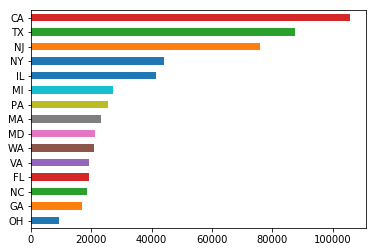

In [61]:
# Checking number of applications state wise.
df.EMPLOYER_STATE.value_counts(ascending=True)[-15:].plot(kind='barh')
plt.show()

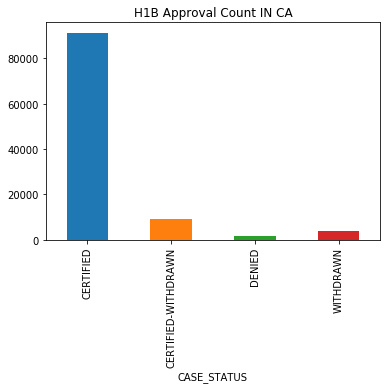

In [62]:
df[df.EMPLOYER_STATE=='CA'].groupby('CASE_STATUS').size().plot(kind='bar')
plt.title('H1B Approval Count IN CA')
plt.show()

In [63]:
df.dtypes

CASE_STATUS                     object
VISA_CLASS                      object
EMPLOYER_NAME                   object
EMPLOYER_STATE                  object
EMPLOYER_POSTAL_CODE            object
EMPLOYER_COUNTRY                object
AGENT_REPRESENTING_EMPLOYER     object
JOB_TITLE                       object
SOC_CODE                        object
NAICS_CODE                      object
TOTAL_WORKERS                    int64
NEW_EMPLOYMENT                   int64
CONTINUED_EMPLOYMENT             int64
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT        int64
CHANGE_EMPLOYER                  int64
AMENDED_PETITION                 int64
FULL_TIME_POSITION              object
PREVAILING_WAGE                float64
PW_UNIT_OF_PAY                  object
PW_WAGE_LEVEL                   object
PW_SOURCE                       object
PW_SOURCE_YEAR                 float64
PW_SOURCE_OTHER                 object
WAGE_RATE_OF_PAY_FROM          float64
WAGE_RATE_OF_PAY_TO      

In [64]:
df['countvar'] = 1
dftop = df.groupby('EMPLOYER_NAME',as_index=False).count().sort_values('countvar',ascending= False)[['EMPLOYER_NAME','countvar']][0:30]
t1 = go.Bar(x=dftop.EMPLOYER_NAME.values,y=dftop.countvar.values,name='top30employer')
layout = go.Layout(dict(title= "TOP EMPLOYERS SPONSORING H1B APPLICATIONS",yaxis=dict(title="Number of applications")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

In [65]:
dftop = df.groupby('EMPLOYER_STATE',as_index=False).count().sort_values('countvar',ascending= False)[['EMPLOYER_STATE','countvar']][0:30]
t1 = go.Bar(x=dftop.EMPLOYER_STATE.values,y=dftop.countvar.values,name='top30employerstate')
layout = go.Layout(dict(title= "TOP STATES BY NUMBER OF H1B APPLICATIONS",yaxis=dict(title="Number of applications")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

In [66]:
dftop = df.groupby('CASE_STATUS',as_index=False).count().sort_values('countvar',ascending= False)[['CASE_STATUS','countvar']]
t1 = go.Bar(x=dftop.CASE_STATUS.values,y=dftop.countvar.values,name='top30')
layout = go.Layout(dict(title= "NUMBER OF APPLICATIONS BY CASE STATUS ",yaxis=dict(title="Number of applications")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

In [67]:
# Number of applications State wise by case status.

# California - CA
dftop = df[df.EMPLOYER_STATE=='CA'].groupby('CASE_STATUS',as_index=False).count().sort_values('countvar',ascending= False)[['CASE_STATUS','countvar']]
t1 = go.Bar(x=dftop.CASE_STATUS.values,y=dftop.countvar.values,name='top30')
layout = go.Layout(dict(title= "NUMBER OF APPLICATIONS IN <b>CALIFORNIA</b> BY CASE STATUS ",yaxis=dict(title="Number of applications")))
data = [t1]
fig =go.Figure(data,layout)
ca = iplot(fig)

# Texas - TX
dftop = df[df.EMPLOYER_STATE=='TX'].groupby('CASE_STATUS',as_index=False).count().sort_values('countvar',ascending= False)[['CASE_STATUS','countvar']]
t1 = go.Bar(x=dftop.CASE_STATUS.values,y=dftop.countvar.values,name='top30')
layout = go.Layout(dict(title= "NUMBER OF APPLICATIONS IN <b>Texas</b> BY CASE STATUS ",yaxis=dict(title="Number of applications")))
data = [t1]
fig =go.Figure(data,layout)
tx = iplot(fig)

# New Jersey - NJ
dftop = df[df.EMPLOYER_STATE=='NJ'].groupby('CASE_STATUS',as_index=False).count().sort_values('countvar',ascending= False)[['CASE_STATUS','countvar']]
t1 = go.Bar(x=dftop.CASE_STATUS.values,y=dftop.countvar.values,name='top30')
layout = go.Layout(dict(title= "NUMBER OF APPLICATIONS IN <b>New Jersey</b> BY CASE STATUS ",yaxis=dict(title="Number of applications")))
data = [t1]
fig =go.Figure(data,layout)
nj = iplot(fig)

# New York - NY
dftop = df[df.EMPLOYER_STATE=='NY'].groupby('CASE_STATUS',as_index=False).count().sort_values('countvar',ascending= False)[['CASE_STATUS','countvar']]
t1 = go.Bar(x=dftop.CASE_STATUS.values,y=dftop.countvar.values,name='top30')
layout = go.Layout(dict(title= "NUMBER OF APPLICATIONS IN <b>New York</b> BY CASE STATUS ",yaxis=dict(title="Number of applications")))
data = [t1]
fig =go.Figure(data,layout)
ny = iplot(fig)

In [68]:
# Univariate Analysis
numerical = df.select_dtypes(include=np.number)
categorical = df.select_dtypes(exclude=np.number)

In [69]:
numerical.shape

(624544, 14)

In [75]:
dftop0 = df[df.AGENT_REPRESENTING_EMPLOYER=='Y'].groupby('CASE_STATUS',as_index=False).count().sort_values('countvar',ascending= False)[['CASE_STATUS','countvar']]
dftop1 = df[df.AGENT_REPRESENTING_EMPLOYER=='N'].groupby('CASE_STATUS',as_index=False).count().sort_values('countvar',ascending= False)[['CASE_STATUS','countvar']]
t0 = go.Bar(x=dftop0.CASE_STATUS.values,y=dftop0.countvar.values,name='Employers with Agent')
t1 = go.Bar(x=dftop1.CASE_STATUS.values,y=dftop1.countvar.values,name='Employers without Agent')
layout = go.Layout(dict(title= "NUMBER OF APPLICATIONS WITH/WITHOUT <b>AGENT</b> BY CASE STATUS ",yaxis=dict(title="Number of applications")))
data = [t0,t1]
fig =go.Figure(data,layout)
ny = iplot(fig)

In [76]:
df['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                                    20638
TATA CONSULTANCY SERVICES LIMITED                  13526
CAPGEMINI AMERICA INC                               9604
IBM INDIA PRIVATE LIMITED                           8734
TECH MAHINDRA (AMERICAS),INC.                       7541
DELOITTE CONSULTING LLP                             7179
ACCENTURE LLP                                       6690
ERNST & YOUNG U.S. LLP                              6096
WIPRO LIMITED                                       5177
GOOGLE INC.                                         5074
MICROSOFT CORPORATION                               5005
HCL AMERICA, INC.                                   4262
SYNTEL CONSULTING INC.                              4187
AMAZON CORPORATE LLC                                4165
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     2707
IBM CORPORATION                                     2546
LARSEN & TOUBRO INFOTECH LIMITED                    1921
L&T TECHNOLOGY SERVICES LIMITED

In [84]:
dftop = df.groupby('EMPLOYER_NAME',as_index=False).count()
dftop = dftop.sort_values('countvar',ascending= False)[['EMPLOYER_NAME','countvar']][0:30]
dftop1 = df.groupby(['EMPLOYER_NAME','CASE_STATUS'],as_index=False).count()
dftop1=dftop1[dftop1.EMPLOYER_NAME.isin(dftop.EMPLOYER_NAME)]
t1 = go.Bar(x=dftop1[dftop1.CASE_STATUS == 'CERTIFIED'].sort_values('countvar',ascending= False)['EMPLOYER_NAME'].values,y=dftop1[dftop1.CASE_STATUS == 'CERTIFIED'].sort_values('countvar',ascending= False)['countvar'].values,name='CERTIFIED')
t2 = go.Bar(x=dftop1[dftop1.CASE_STATUS == 'CERTIFIED-WITHDRAWN'].sort_values('countvar',ascending= False)['EMPLOYER_NAME'].values,y=dftop1[dftop1.CASE_STATUS == 'CERTIFIED-WITHDRAWN'].sort_values('countvar',ascending= False)['countvar'].values,name='CERTIFIED-WITHDRAWN')
t3 = go.Bar(x=dftop1[dftop1.CASE_STATUS == 'DENIED'].sort_values('countvar',ascending= False)['EMPLOYER_NAME'].values,y=dftop1[dftop1.CASE_STATUS == 'DENIED'].sort_values('countvar',ascending= False)['countvar'].values,name='DENIED')
t4 = go.Bar(x=dftop1[dftop1.CASE_STATUS == 'WITHDRAWN'].sort_values('countvar',ascending= False)['EMPLOYER_NAME'].values,y=dftop1[dftop1.CASE_STATUS == 'WITHDRAWN'].sort_values('countvar',ascending= False)['countvar'].values,name='WITHDRAWN')

data = [t1,t2,t3,t4]
layout = go.Layout((dict(title= "CASE STATUS OF TOP EMPLOYERS SPONSORING H1B APPLICATIONS",yaxis=dict(title="Number of applications"))),barmode='stack'
)

fig =go.Figure(data,layout)
iplot(fig)

In [86]:
df['countvar'] = 1
dftop = df.groupby('JOB_TITLE',as_index=False).count().sort_values('countvar',ascending= False)[['JOB_TITLE','countvar']][0:30]
t1 = go.Bar(x=dftop.JOB_TITLE.values,y=dftop.countvar.values,name='jobtitle')
layout = go.Layout(dict(title= "TOP JOB PROFILES FOR H-1B APPLICATIONS",yaxis=dict(title="Number of applications")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

Text(0.5,1,'Decision Duration v/s Number of applications ')

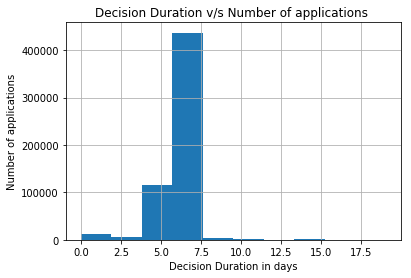

In [92]:
df[df.DECISION_DURATION<20].DECISION_DURATION.hist()
plt.xlabel('Decision Duration in days')
plt.ylabel('Number of applications')
plt.title('Decision Duration v/s Number of applications ')